# Import and definitions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import functions_simulation as sim
snscolors=sns.color_palette() 

# Simulations to show time traces (Fig 2B-E)

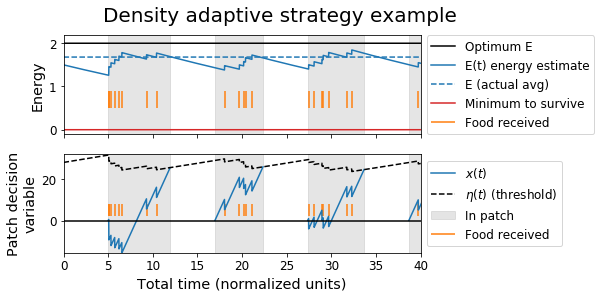

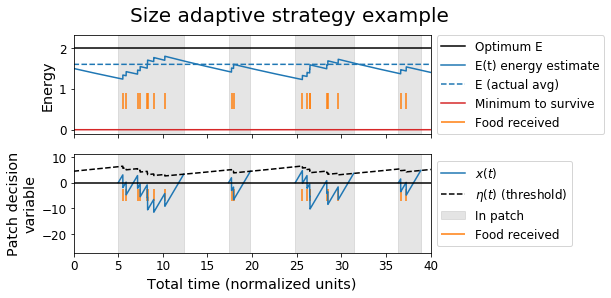

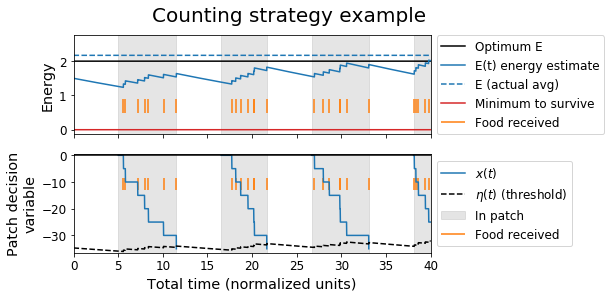

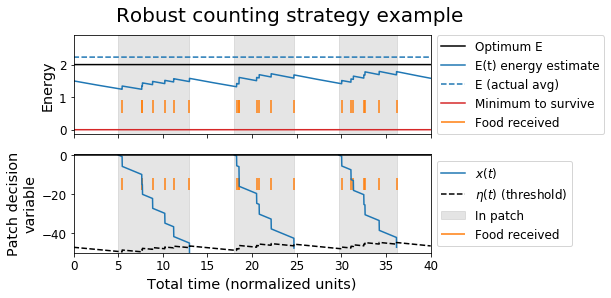

In [7]:
Evalue = 2
tau_patch = 5
Ttravel=5



##############################################################################################################################
strategynames = ['Density adaptive','Size adaptive','Counting','Robust counting']
rho0=sim.getrho0_Eopt(Evalue,tau_patch,Ttravel)
alphasize = sim.alpha_opt(Evalue,rho0,tau_patch)/rho0
alphachoicevalues=[1,alphasize*1.05,0,-0.2]

E0mult=0.75  # for initializing the energy estimate

sim.totaltime=500

sigmavalue=0
chunksize=5

for snum in range(4):  # strategy number
    alphachoice=alphachoicevalues[snum]
    allE, allEactual, allx, patchsteps, travelsteps, _ = sim.modelsimulation(totaltime=sim.totaltime, dt=sim.dt, # time in seconds
                        tau_E=sim.tau_E, Ttravel=Ttravel, rho0=rho0, tau_patch=tau_patch, 
                        beta=0, sigma=sigmavalue*rho0, sigma_rho0=0.0*rho0, sigma_taupatch=0.0*tau_patch, 
                        sigma_Ttravel=0,
                        q=chunksize,
                        alphachoice=alphachoice,
                        E0mult=E0mult,
                        timetrace=True)

    meanEactual = np.mean(allEactual)
    alleta = sim.eta_opt(allE,rho0,tau_patch,alpha=rho0*alphachoice)  # the threshold used

    numpatches=3
    lsize=12
    plotrange=[0,(patchsteps[numpatches-1][1])*sim.dt+2]
    plotrange=[0,40]
    numsteps=len(allE)
    timevalues=np.arange(0,numsteps)*sim.dt

    f,ax=plt.subplots(2,1,sharex=True)
    f.set_size_inches(8,4)
    for k in range(len(patchsteps)):
        ax[0].axvspan((patchsteps[k][0]-1)*sim.dt, (patchsteps[k][1]-0)*sim.dt, alpha=0.2, color='gray')
    ax[0].plot(timevalues,np.ones(numsteps)*Evalue,label='Optimum E',color='k')
    ax[0].plot(timevalues,allE,label='E(t) energy estimate',color=snscolors[0])
    ax[0].plot(timevalues,meanEactual*np.ones(numsteps),'--',label='E (actual avg)',color=snscolors[0])
    ax[0].set_ylabel('Energy',fontsize=1.2*lsize)
    ax[0].set_xlim(plotrange)
    if chunksize>0:
        ax[0].eventplot(timevalues[allEactual>0],color=snscolors[1],linelengths=0.4,lineoffsets=0.7,label="Food received")
    ax[0].plot(timevalues,np.zeros(numsteps),label='Minimum to survive',color=snscolors[3])

    for k in range(len(patchsteps)):
        t0=patchsteps[k][0]
        t1=patchsteps[k][1]+1
        if k==0:  # add a legend entry, but only do it once
            ax[1].axvspan((patchsteps[k][0]-1)*sim.dt, patchsteps[k][1]*sim.dt, alpha=0.2, color='gray',label='In patch')
            ax[1].plot(timevalues[t0:t1],allx[t0:t1],color=snscolors[0],label='$x(t)$')                    
        else:
            ax[1].axvspan((patchsteps[k][0]-1)*sim.dt, (patchsteps[k][1])*sim.dt, alpha=0.2, color='gray')
            ax[1].plot(timevalues[t0:t1],allx[t0:t1],color=snscolors[0])      

    ax[1].plot(timevalues,alleta,'k--',label='$\eta(t)$ (threshold)')    
    ax[1].set_xlabel('Total time (normalized units)',fontsize=1.2*lsize)
    ax[1].set_ylabel('Patch decision\nvariable',fontsize=1.2*lsize)
    ax[1].axhline(y=0, color='k')
    if np.max(alleta)>0:
        ylim=[np.min(allx),np.max(alleta)+0.5]
        ax[1].set_ylim(ylim)
    else:
        ylim = [np.min(alleta)-0.5,np.max(allx)+0.5]
        ax[1].set_ylim(ylim)
    if chunksize>0:
        ax[1].eventplot(timevalues[allEactual>0],color=snscolors[1],linelengths=np.abs(np.diff(ylim))/8,lineoffsets=0.6*np.mean(ylim),label="Food received")    
    # create the legends for both
    # Shrink current axis by 20%, then put legend tothe right
    for ax in ax:
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
        # Put a legend to the right of the current axis
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=lsize)
        ax.tick_params(labelsize=lsize)
    plt.suptitle(strategynames[snum]+' strategy example',fontsize=20)
    plt.show()

# Plot of the treshold vs drift rate (Fig 2A)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

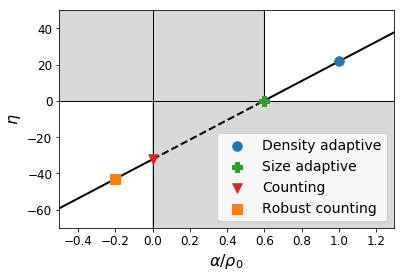

In [9]:
# note: this uses parameters that are set above

dalpha=0.01
alphanegative = np.arange(-0.5,0,dalpha)
alphanotused = np.arange(0,alphasize,dalpha)
alphapositive = np.arange(alphasize,1.3,dalpha)
xmin, xmax = [np.min(alphanegative),np.max(alphapositive)]
alleta = [sim.eta_opt(Evalue,rho0,tau_patch,alpha=rho0*a) for a in [alphanegative,alphanotused,alphapositive]]  # the threshold used

lw = 2.0
plt.plot(alphanegative,alleta[0],'k',linewidth=lw)
plt.plot(alphanotused,alleta[1],'k--',linewidth=lw)
plt.plot(alphapositive,alleta[2],'k',linewidth=lw)
plt.xlim([xmin,xmax])

plt.xlabel('$\\alpha/\\rho_0$',fontsize=16)
plt.ylabel('$\eta$',fontsize=16)


ymin = -70
ymax = 50
plt.ylim([ymin,ymax])

[plt.vlines(x=xval,ymin=ymin,ymax=ymax,linewidth=1.0) for xval in [0]]
plt.hlines(y=0,xmin=xmin,xmax=xmax,linewidth=1.0)
plt.vlines(x=alphasize,ymin=0,ymax=50,linewidth=1.0)
#plt.axvspan(0,alphasize, alpha=0.5, color='grey')
#plt.axvspan(-0.5,0,ymin=-ymin/(ymax-ymin),ymax=1, alpha=0.5,color='grey')
#plt.axvspan(alphasize,1.3,ymin=0,ymax=-ymin/(ymax-ymin), alpha=0.5,color='grey')
plt.axhspan(0,50,xmin=0,xmax=(0.5+alphasize)/1.8,alpha=0.3,color='grey')
plt.axhspan(-70,0,xmin=(0.5)/1.8,xmax=1,alpha=0.3,color='grey')


alphachoice_tp=[1,alphasize,0,-0.2]
etachoice = [sim.eta_opt(Evalue,rho0,tau_patch,alpha=rho0*a) for a in alphachoice_tp]  # the threshold used

styles=['o','P','v','s']
cnum=[0,2,3,1]
for i in range(4):
    plt.scatter(alphachoice_tp[i],etachoice[i],zorder=10,s=90,c=snscolors[cnum[i]],marker=styles[i],label=strategynames[i])
plt.tick_params(labelsize=lsize)
plt.legend(fontsize=14)
plt.show()